# scRNA-Seq pre-processing

Pre-processing pipleine with scanpy

In [178]:

import os 
import pandas as pd
import numpy as np
import scanpy as sc
import scipy as sci
import matplotlib.pyplot as plt
import anndata as ad

In [179]:
# Read features
url = 'https://raw.githubusercontent.com/jamesfread/scRNAseq_Preprocessing/main/Data/Donor2_5yr_Unstim_features.tsv'
ft = pd.read_csv(url, sep='\t', header=None)

# Read barcodes
url = "https://raw.githubusercontent.com/jamesfread/scRNAseq_Preprocessing/main/Data/Donor2_5yr_Unstim_barcodes.tsv"
bc = pd.read_csv(url, sep='\t', header=None)

mat = sc.read_mtx('Data/Donor2_5yr_Unstim_matrix.mtx')
print(mat)
mat = ad.AnnData.transpose(mat)
print(mat)




AnnData object with n_obs × n_vars = 36601 × 1482511
AnnData object with n_obs × n_vars = 1482511 × 36601


Check data

In [184]:
print(ft.head(5))
print(bc.head(5))
mat

                 0            1                2
0  ENSG00000243485  MIR1302-2HG  Gene Expression
1  ENSG00000237613      FAM138A  Gene Expression
2  ENSG00000186092        OR4F5  Gene Expression
3  ENSG00000238009   AL627309.1  Gene Expression
4  ENSG00000239945   AL627309.3  Gene Expression
                    0
0  AAACCCAAGAAACACT-1
1  AAACCCAAGAAACCCA-1
2  AAACCCAAGAAACCCG-1
3  AAACCCAAGAAACCTG-1
4  AAACCCAAGAAACTAC-1


AnnData object with n_obs × n_vars = 1482511 × 36601

Add barcode and gene names to anndata object

In [183]:
print(ft.shape[0]) 
print(bc.shape[0])
print(mat.shape[0]); print(mat.shape[1]) 

36601
1482511
1482511
36601


In [185]:
mat.obs_names = bc[0]
mat.var_names = ft[1]
print(mat.obs_names[:10])
print(mat.var_names[:10])
print(mat)

Index(['AAACCCAAGAAACACT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1',
       'AAACCCAAGAAACCTG-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTGT-1',
       'AAACCCAAGAAAGCGA-1', 'AAACCCAAGAAATTGC-1', 'AAACCCAAGAACAGGA-1',
       'AAACCCAAGAACCCGA-1'],
      dtype='object')
Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1'],
      dtype='object')
AnnData object with n_obs × n_vars = 1482511 × 36601


Next, will need to remove cells with only ambient RNA levels 

In [122]:
cutoff1 =  100; cutoff2 =  200; cutoff3 =  500; cutoff4 =  1000
knee = np.sort((np.array(mat.X.sum(axis=1))).flatten())[::-1]
cell_set = np.arange(len(knee))

Show the number of cell for each threshold

In [123]:
set = [cutoff1, cutoff2, cutoff3, cutoff4]

# access elements of the list one by one
for i in set:
    if i == 100: j = "100 UMIs"; 
    if i == 200: j = "200 UMIs";
    if i == 500: j = "500 UMIs";
    if i == 1000: j = "1000 UMIs"
    
    print(j, " = ", cell_set[knee > i][::-1][0])

100 UMIs  =  12023
200 UMIs  =  10528
500 UMIs  =  7972
1000 UMIs  =  5512


Plot the elbow plot

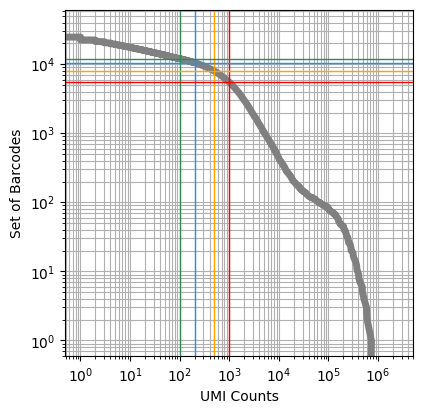

In [124]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))

ax.loglog(knee, cell_set, linewidth=5, color="grey")
ax.axvline(x=cutoff1, linewidth=1, color="seagreen")
ax.axvline(x=cutoff2, linewidth=1, color="dodgerblue")
ax.axvline(x=cutoff3, linewidth=1, color="orange")
ax.axvline(x=cutoff4, linewidth=1, color="red")

ax.axhline(y=cell_set[knee > cutoff1][::-1][0], linewidth=1, color="seagreen")
ax.axhline(y=cell_set[knee > cutoff2][::-1][0], linewidth=1, color="dodgerblue")
ax.axhline(y=cell_set[knee > cutoff3][::-1][0], linewidth=1, color="orange")
ax.axhline(y=cell_set[knee > cutoff4][::-1][0], linewidth=1, color="red")


ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
plt.show()

Make cutoff 500

In [125]:
expected_num_cells = cell_set[knee > cutoff3][::-1][0]

expected_num_cells

7972

In [130]:
# Filter the cells according to the threshold determined from the knee plot
mat2 = mat.copy()
#sc.pp.filter_cells(mat2, min_genes=cutoff3)
sc.pp.filter_cells(mat2, min_counts=knee[expected_num_cells])

print(mat)
print(mat2)

AnnData object with n_obs × n_vars = 36601 × 1482511
AnnData object with n_obs × n_vars = 7973 × 1482511
    obs: 'n_counts'


c:\Users\jread\AppData\Local\anaconda3\envs\scRNAseq_py3_11\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [131]:
print(mat.obs_names[:10])
print(mat.var_names[:10])

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1'],
      dtype='object')
Index(['AAACCCAAGAAACACT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1',
       'AAACCCAAGAAACCTG-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTGT-1',
       'AAACCCAAGAAAGCGA-1', 'AAACCCAAGAAATTGC-1', 'AAACCCAAGAACAGGA-1',
       'AAACCCAAGAACCCGA-1'],
      dtype='object')


Continue here:
https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

https://www.kallistobus.tools/tutorials/kb_getting_started/python/kb_intro_2_python/
